# Telco Customer Churn Analysis and Prediction

_Matteo Facchetti_, _Mario Damiano Russo_, _Mirko Frigerio_.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Univariate-and-Bivariate-Analysis" data-toc-modified-id="Univariate-and-Bivariate-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Univariate and Bivariate Analysis</a></span><ul class="toc-item"><li><span><a href="#Customer-Churn" data-toc-modified-id="Customer-Churn-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Customer Churn</a></span></li><li><span><a href="#Gender-distribution" data-toc-modified-id="Gender-distribution-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gender distribution</a></span></li><li><span><a href="#Age-distribution" data-toc-modified-id="Age-distribution-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Age distribution</a></span></li><li><span><a href="#Phone-Service-distribution" data-toc-modified-id="Phone-Service-distribution-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Phone Service distribution</a></span></li><li><span><a href="#Internet-service-distribution" data-toc-modified-id="Internet-service-distribution-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Internet service distribution</a></span></li><li><span><a href="#Tenure-distribution" data-toc-modified-id="Tenure-distribution-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Tenure distribution</a></span></li><li><span><a href="#Contract-distribution" data-toc-modified-id="Contract-distribution-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Contract distribution</a></span></li></ul></li><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Train-test split</a></span></li><li><span><a href="#Dealing-with-Missing-Values" data-toc-modified-id="Dealing-with-Missing-Values-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dealing with Missing Values</a></span><ul class="toc-item"><li><span><a href="#Encoding-the-dummy-variables" data-toc-modified-id="Encoding-the-dummy-variables-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Encoding the dummy variables</a></span></li></ul></li><li><span><a href="#Dealing-with-Outliers" data-toc-modified-id="Dealing-with-Outliers-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dealing with Outliers</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model evaluation</a></span></li><li><span><a href="#Resampling-methods" data-toc-modified-id="Resampling-methods-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Resampling methods</a></span></li></ul></div>

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
import scipy

from matplotlib import cm
from IPython.display import display
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pylab as pl
import scikitplot as skplt
import plotly.graph_objs as go
import plotly.offline as py
from PIL import  Image
import plotly.tools as tls
import plotly.figure_factory as ff
import matplotlib.ticker as mtick
from mlxtend.plotting import plot_confusion_matrix

pd.options.display.max_columns = None
sns.set()
%matplotlib inline
py.init_notebook_mode(connected=True)

In [200]:
tcc = pd.read_csv("tcc.csv")

In [201]:
tcc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Univariate and Bivariate Analysis

### Customer Churn

Let's first have a look at the churn rate.

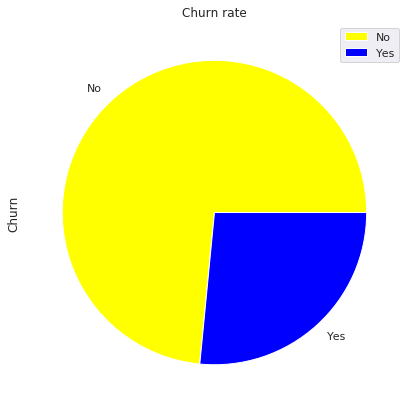

In [202]:
senior = (tcc['Churn'].value_counts()*100.0 /len(tcc)).plot(kind='pie',\
        labels = ['No', 'Yes'], figsize = (7,7) , colors = ['yellow','blue'])

senior.set_title('Churn rate')
senior.legend(labels=['No','Yes']);

One customer over four churns.

### Gender distribution

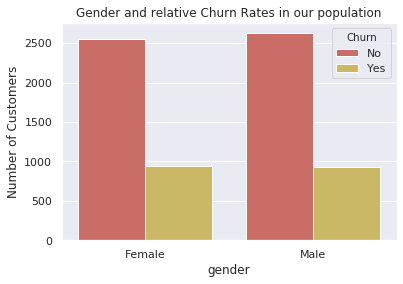

In [203]:
gb = tcc.groupby("gender")["Churn"].value_counts().to_frame().rename({"Churn": "Number of Customers"}, axis = 1).reset_index()
sns.barplot(x = "gender", y = "Number of Customers", data = gb, hue = "Churn", palette = sns.color_palette("hls", 8)).set_title("Gender and relative Churn Rates in our population");

Men and women are evenly distributed in our sample, and show the same proportions of Churn.

### Age distribution

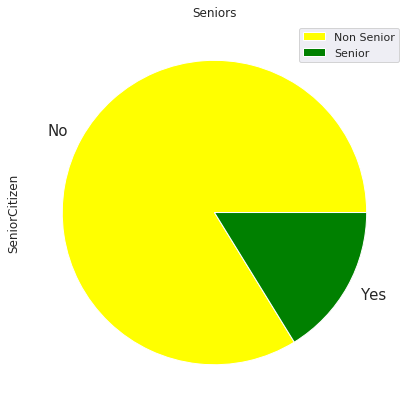

In [204]:
senior = (tcc['SeniorCitizen'].value_counts()*100.0 /len(tcc)).plot(kind='pie',\
        labels = ['No', 'Yes'], figsize = (7,7) , colors = ['yellow','green'], fontsize = 15)

senior.set_title('Seniors')
senior.legend(labels=['Non Senior','Senior']);

In [205]:
gb = tcc.groupby("SeniorCitizen")["Churn"].value_counts().to_frame().rename({"Churn": "Number of Customers"}, axis = 1).reset_index()
gb.replace([0, 1], ["Young", "Senior"], inplace = True)
gb

,SeniorCitizen,Churn,Number of Customers
0,Young,No,4508
1,Young,Yes,1393
2,Senior,No,666
3,Senior,Yes,476


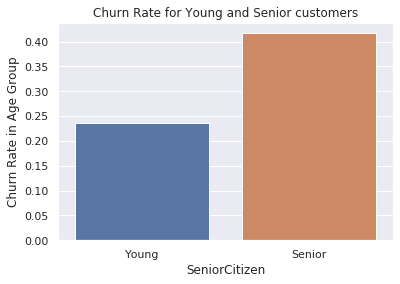

In [206]:
tp = gb.groupby("SeniorCitizen")["Number of Customers"].sum().to_frame().reset_index().rename({"Number of Customers": "# Customers in Age Group"}, axis = 1)
gb = pd.merge(gb, tp, on = "SeniorCitizen")
gb["Churn Rate in Age Group"] = gb["Number of Customers"]/gb["# Customers in Age Group"]
gb = gb[gb.Churn == "Yes"]

sns.barplot(x = "SeniorCitizen", y = "Churn Rate in Age Group", data = gb).set_title("Churn Rate for Young and Senior customers");

Our sample is mainly composed by young people. Senior customers are more prone to churning.

### Phone Service distribution

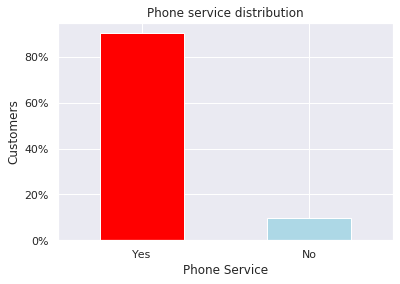

In [207]:
phone = (tcc['PhoneService'].value_counts()*100.0 /len(tcc)).plot(kind='bar', stacked = True,\
                                                rot = 0, color = ['red','lightblue'])
  
phone.yaxis.set_major_formatter(mtick.PercentFormatter())
phone.set_ylabel('Customers')
phone.set_xlabel('Phone Service')
phone.set_ylabel('Customers')
phone.set_title('Phone service distribution');

Just a little amount of people does not have phone service.

### Internet service distribution

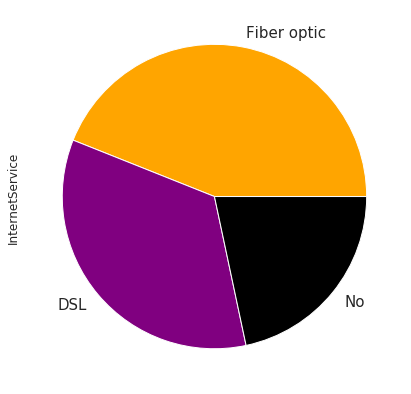

In [208]:
internet = (tcc['InternetService'].value_counts()*100.0 /len(tcc)).plot(kind='pie',\
        labels = ['Fiber optic', 'DSL', 'No'], figsize = (7,7) , colors = ['orange','purple', 'black'], fontsize = 15)

senior.set_title('Seniors')
senior.legend(labels=['Non Senior','Senior']);

Among the ones that have internet service, DSL and Fiber optic are almost equally distributed (the fraction of people having Fiber optic is slightly greater). Less than one fourth of the members of our sample has no internet service.

### Tenure distribution

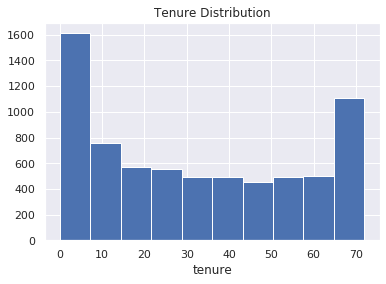

In [209]:
plt.hist(tcc.tenure)
plt.xlabel('tenure')
plt.title("Tenure Distribution");

The majority of the customers in our sample are new clients. There is also a high number of people with a tenure around 70 months. Most likely the company is not older than 72 months, and there either was a strong incentive for subscription (like a competitive launch offer, which could explain the high number through efficient retention rates) or there was some form of selection bias (the offers were unique on the market and highly valued by a group of customers, leading to fast market saturation, which could explain the high number by keeping the retention rate constant and leveraging high sales volumes). These are the only two reasons that can explain such a sharp kickstart in the number of subscriptions and their sudden drop.

### Contract distribution

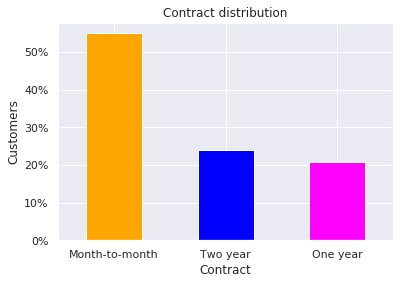

In [210]:
contract = (tcc['Contract'].value_counts()*100.0 /len(tcc)).plot(kind='bar', stacked = True,\
                                                rot = 0, color = ['orange','blue','magenta'])
  
contract.yaxis.set_major_formatter(mtick.PercentFormatter())
contract.set_ylabel('Customers')
contract.set_xlabel('Contract')
contract.set_ylabel('Customers')
contract.set_title('Contract distribution');

More than half customers have a month-to-month contract.

## Train-test split

Before building our predictive model, we will split the dataset into train and test set, in order to measure the accuracy of our model.

In [211]:
msk = np.random.rand(len(tcc)) < 0.8
test = tcc[~msk]
tcc = tcc[msk]

## Dealing with Missing Values

In [212]:
missing_values = []
for col in tcc.columns:
    missing_values.append(tcc[col].isna().any())

missing_values = pd.DataFrame(np.array(missing_values).reshape(1, 21))
missing_values.columns = tcc.columns
missing_values_table   = tcc.append(missing_values).tail(1)
missing_values_table   = missing_values_table.astype(bool)
missing_values_table   = missing_values_table.transpose()
missing_values_table.columns = ["Missing?"]

missing_values_table["dtype"] = tcc.dtypes
missing_values_table

,Missing?,dtype
customerID,False,object
gender,False,object
SeniorCitizen,False,int64
Partner,False,object
Dependents,False,object
tenure,False,int64
PhoneService,False,object
MultipleLines,False,object
InternetService,False,object
OnlineSecurity,False,object


The dtypes are not coherent with logic. There's no point in encoding TotalCharges as a string and MonthlyCharges as a float, or PhoneService as Yes/No and SeniorCitizen as a 0/1 dummy. Let's fix that.

In [213]:
try:
    tcc.TotalCharges.astype("float64")
except ValueError:
    print("We can't convert this column to floats, there must be some non-convertible values")

We can't convert this column to floats, there must be some non-convertible values


In [214]:
print(tcc.TotalCharges.value_counts().head())
print("")
print("We have 11 observations that take an empty string value. Let's drop that. The string we want to drop is:")
tcc.TotalCharges.value_counts().index[1]

         10
20.2      9
19.9      8
19.55     7
19.75     6
Name: TotalCharges, dtype: int64

We have 11 observations that take an empty string value. Let's drop that. The string we want to drop is:


'20.2'

Let's drop the observations with empty values, reset the index and now we should be able to convert the TotalCharges column to float:

In [215]:
def fill_missing(df):
    df.drop(df[df.TotalCharges == " "].index, axis = 0, inplace = True)
    df.reset_index(drop = True, inplace = True)
    df.TotalCharges = df.TotalCharges.astype("float64")
    return df

In [216]:
tcc = fill_missing(tcc)

Let's compute some last computations before extracting the Dummy Variables from our dataset and proceeding to the Regression Part.

In [217]:
for col in tcc.columns:
    print("{0}: {1}".format(col, tcc.loc[:, col].unique()))

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 28 62 13 58 49 25 69 52 71 10 12 30 47 72 17  5 46 11
 63 43 15 60 18 66  9 50  3 56  7 42 35 48 65 38 68 32 55 37 64 36 41 27
  6  4 33 23 57 14 16 53 20 40 59 24 19 61 29 31 54 51 67 21 70 44 39 26]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 '

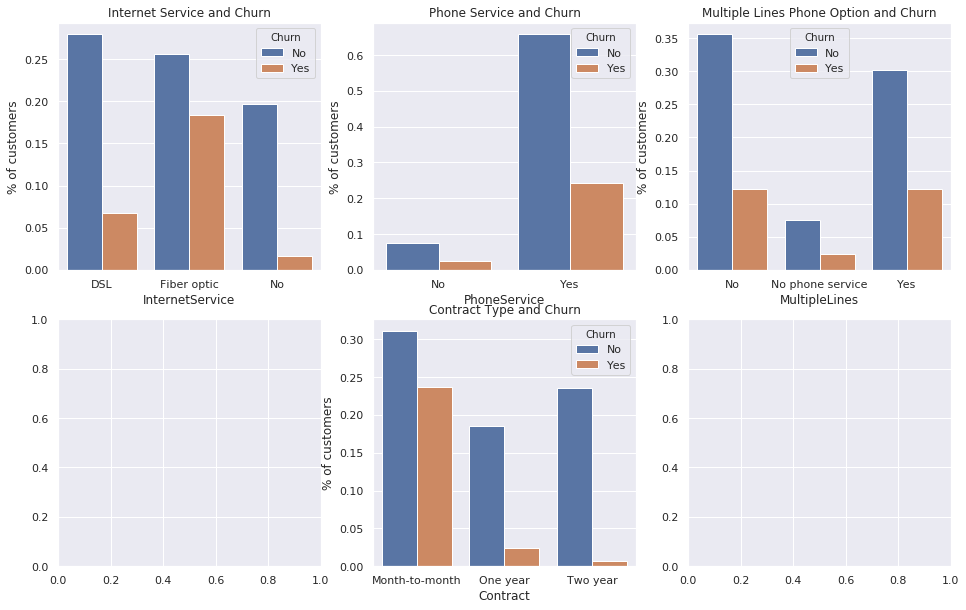

In [218]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 10))

gb = tcc.groupby("InternetService")["Churn"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"Churn": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "InternetService", y = "% of customers", data = gb, hue = "Churn", ax = axis[0][0]).set_title("Internet Service and Churn");

gb = tcc.groupby("PhoneService")["Churn"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"Churn": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "PhoneService", y = "% of customers", data = gb, hue = "Churn", ax = axis[0][1]).set_title("Phone Service and Churn");

gb = tcc.groupby("MultipleLines")["Churn"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"Churn": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "MultipleLines", y = "% of customers", data = gb, hue = "Churn", ax = axis[0][2]).set_title("Multiple Lines Phone Option and Churn");

gb = tcc.groupby("Contract")["Churn"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"Churn": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "Contract", y = "% of customers", data = gb, hue = "Churn", ax = axis[1][1]).set_title("Contract Type and Churn");

We notice that The customers with Fiber optic tend to churn a lot more when compared to DSL and No Internet. Maybe the Internet connection offered is low-quality? (Other option: Elder Customers don't need an internet connection. Spoiler: No. See following graph that proves that elderly are proportionally more connected than youngsters and are only a reduced percentage of the population).

MultipleLines do not seem to affect the churn rate.

Shorter-term contract renewals are highly correlated with the churn rate. But most likely it's an omitted variable bias issue: the more I trust a provider, the more I reason in long-terms with it.

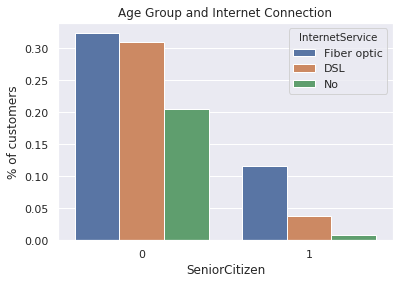

In [219]:
gb = tcc.groupby("SeniorCitizen")["InternetService"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"InternetService": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "SeniorCitizen", y = "% of customers", data = gb, hue = "InternetService").set_title("Age Group and Internet Connection");

Now we want to see how the "Additional Internet Services" that follow the variable pattern: ["No", "Yes", "No internet service"] affect the churn rate.

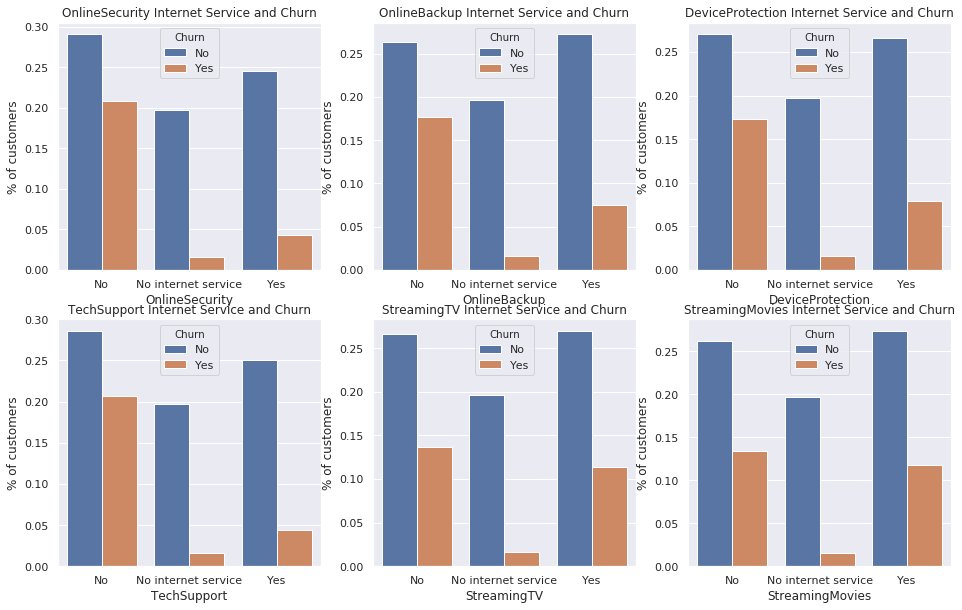

In [220]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 10))

gb = tcc.groupby("OnlineSecurity")["Churn"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"Churn": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "OnlineSecurity", y = "% of customers", data = gb, hue = "Churn", ax = axis[0][0]).set_title("OnlineSecurity Internet Service and Churn")

gb = tcc.groupby("OnlineBackup")["Churn"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"Churn": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "OnlineBackup", y = "% of customers", data = gb, hue = "Churn", ax = axis[0][1]).set_title("OnlineBackup Internet Service and Churn")

gb = tcc.groupby("DeviceProtection")["Churn"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"Churn": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "DeviceProtection", y = "% of customers", data = gb, hue = "Churn", ax = axis[0][2]).set_title("DeviceProtection Internet Service and Churn")

gb = tcc.groupby("TechSupport")["Churn"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"Churn": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "TechSupport", y = "% of customers", data = gb, hue = "Churn", ax = axis[1][0]).set_title("TechSupport Internet Service and Churn")

gb = tcc.groupby("StreamingTV")["Churn"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"Churn": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "StreamingTV", y = "% of customers", data = gb, hue = "Churn", ax = axis[1][1]).set_title("StreamingTV Internet Service and Churn")

gb = tcc.groupby("StreamingMovies")["Churn"].value_counts()/len(tcc)
gb = gb.to_frame().rename({"Churn": "% of customers"}, axis = 1).reset_index()
sns.barplot(x = "StreamingMovies", y = "% of customers", data = gb, hue = "Churn", ax = axis[1][2]).set_title("StreamingMovies Internet Service and Churn");

- OnlineSecurity, OnlineBackup, TechSupport seem to have a significant impact on lowering the churn. If the company wants to lower the churn rate, It may be a good idea to include these services as standard in the following order: OnlineSecurity, TechSupport, OnlineBackUp, DeviceProtection (although removing the internet connection service altogether may be potentially be more beneficial, at least the Fiber one; see graphs above for details). Although unlikely, it is also possible that these services get cumulated with tenure, and thus their effect on the churn only reflects the negative impact of tenure on the churn rate; in the next cells we will try to figure out whether this is true or not.

- StreamingTV and StreamingMovies do not seem to have a large enough effect on customer Churn Rate.

To assess whether additional services are accumulated through tenure (e.g. fidalty programs), we run a lmplot for each additional Internet service.

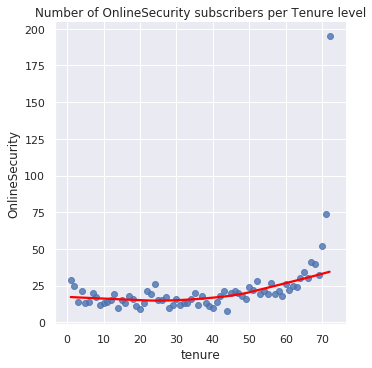

In [221]:
gb = tcc[(tcc.OnlineSecurity != "No internet service")].replace(["Yes", "No"], [1, 0]).groupby("tenure")["OnlineSecurity"].sum().to_frame().reset_index()
sns.lmplot("tenure", "OnlineSecurity", data = gb, line_kws={'color': 'red'}, lowess = True);
ax = plt.gca()
ax.set_title("Number of OnlineSecurity subscribers per Tenure level");

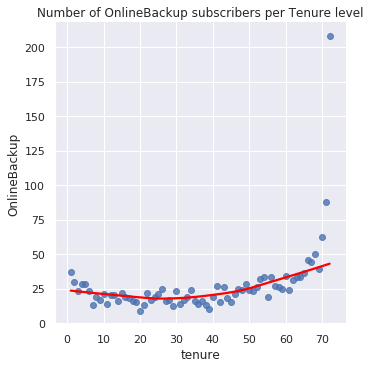

In [222]:
gb = tcc[(tcc.OnlineSecurity != "No internet service")].replace(["Yes", "No"], [1, 0]).groupby("tenure")["OnlineBackup"].sum().to_frame().reset_index()
sns.lmplot("tenure", "OnlineBackup", data = gb, line_kws={'color': 'red'}, lowess = True)
ax = plt.gca()
ax.set_title("Number of OnlineBackup subscribers per Tenure level");

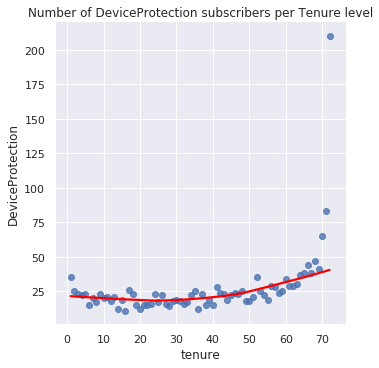

In [223]:
gb = tcc[(tcc.OnlineSecurity != "No internet service")].replace(["Yes", "No"], [1, 0]).groupby("tenure")["DeviceProtection"].sum().to_frame().reset_index()
sns.lmplot("tenure", "DeviceProtection", data = gb, line_kws={'color': 'red'}, lowess = True)
ax = plt.gca()
ax.set_title("Number of DeviceProtection subscribers per Tenure level");

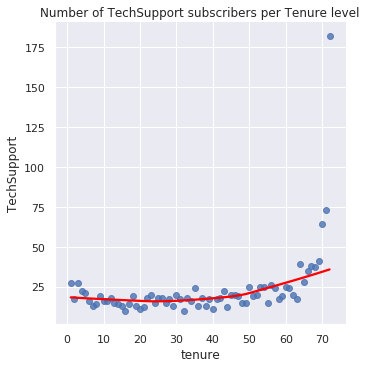

In [224]:
gb = tcc[(tcc.OnlineSecurity != "No internet service")].replace(["Yes", "No"], [1, 0]).groupby("tenure")["TechSupport"].sum().to_frame().reset_index()
sns.lmplot("tenure", "TechSupport", data = gb, line_kws={'color': 'red'}, lowess = True)
ax = plt.gca()
ax.set_title("Number of TechSupport subscribers per Tenure level");

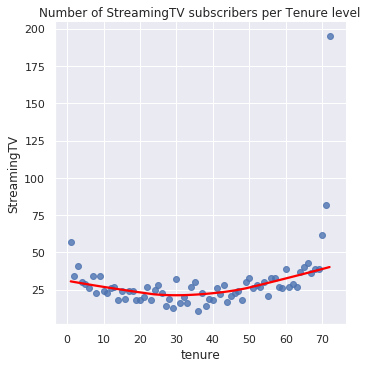

In [225]:
gb = tcc[(tcc.OnlineSecurity != "No internet service")].replace(["Yes", "No"], [1, 0]).groupby("tenure")["StreamingTV"].sum().to_frame().reset_index()
sns.lmplot("tenure", "StreamingTV", data = gb, line_kws={'color': 'red'}, lowess = True)
ax = plt.gca()
ax.set_title("Number of StreamingTV subscribers per Tenure level");

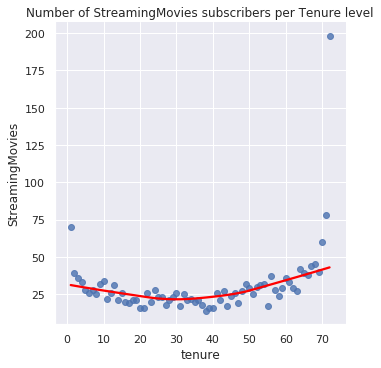

In [226]:
gb = tcc[(tcc.OnlineSecurity != "No internet service")].replace(["Yes", "No"], [1, 0]).groupby("tenure")["StreamingMovies"].sum().to_frame().reset_index()
sns.lmplot("tenure", "StreamingMovies", data = gb, line_kws={'color': 'red'}, lowess = True)
ax = plt.gca()
ax.set_title("Number of StreamingMovies subscribers per Tenure level");

The absolute number of each Additional Service seems to move in syncro with the others as tenure increases. It does not seem that there is any significant correlation between the number of active Additional Services and tenure, although people with borderline tenures have an extremely high number of Additional Services.

It's weird that so many people with high tenures have so many additional services. Is it just that there are many people with maximum tenure although the percentage of additional services across tenure level stays the same? Hypothesis: at the beginning, the company had a launch offer all-included. Let's check the percentages of people that have these services for each tenure level.

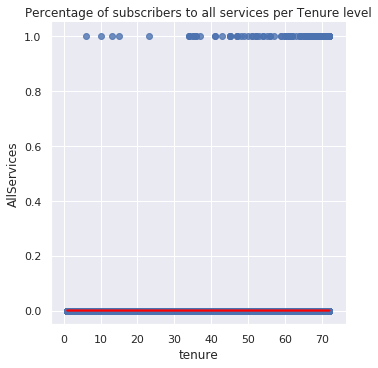

In [227]:
gb = tcc[(tcc.OnlineSecurity != "No internet service")].replace(["Yes", "No"], [1, 0])
gb["AllServices"] = gb.OnlineSecurity*gb.OnlineBackup*gb.DeviceProtection*gb.TechSupport*gb.StreamingTV*gb.StreamingMovies
sns.lmplot("tenure", "AllServices", data = gb, line_kws={'color': 'red'}, lowess = True);
ax = plt.gca()
ax.set_title("Percentage of subscribers to all services per Tenure level");

In [228]:
tvc = gb.tenure.value_counts()
i = []
v = []
for tenure in tvc.index:
    i.append(tenure)
    v.append(len(gb[(gb.tenure == tenure) & (gb.AllServices == 1)])/len(gb[gb.tenure == tenure]))

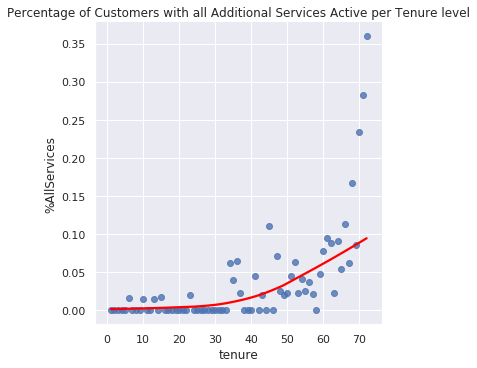

In [229]:
df = pd.DataFrame(data = v, index = i, columns = ["%AllServices"]).reset_index().sort_values("index").reset_index(drop = True).rename({"index": "tenure"}, axis = 1)
sns.lmplot("tenure", "%AllServices", data = df, line_kws={'color': 'red'}, lowess = True)
ax = plt.gca()
ax.set_title("Percentage of Customers with all Additional Services Active per Tenure level");

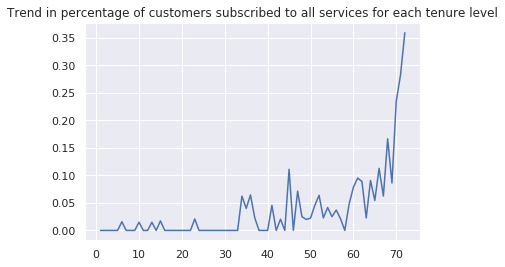

In [230]:
plt.plot(df.tenure, df["%AllServices"]);
ax = plt.gca()
ax.set_title("Trend in percentage of customers subscribed to all services for each tenure level");

<a id='HERE'></a>

Indeed, it seems that the people who subscribed for first have many additional services. Possible explanations:
- Launch offer: all additional services forever included at a discounted price.
- Selection bias: the first customers are the ones who appreciate the most the services offered by the company.

Either case, we can dismiss the hypothesis that additional services are accumulated through tenure, for two reasons:
- There is a strong spike up in the percentage and number of users with all the services around tenure = 70. Nonetheless, the trend in percentage of users with all the services grows constantly, while the absolute number of the individual services stays pretty much constant across tenure levels. This means the the increase in percentage is justifiable only by a convenient launch offer all-inclusive, that rules out the large amount of active offers for customers with extremely high tenure. [This regression](#another_cell) confirms our result;
- if there was a cumulation of benefits, the drop on the 69th tenure value could be hardly justifiable, whereas it could be justified by a change in the offer or a decrease in interest towards the company.

### Encoding the dummy variables

In [231]:
def get_dummy(df):
    df = pd.get_dummies(df.iloc[:, 1 :])
    return df

In [232]:
tcc = get_dummy(tcc)
tcc.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


In [233]:
tcc.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet serv

Let's have a look at the variables.

In [234]:
for col in tcc.columns:
    print("{0}: {1}".format(col, tcc.loc[:, col].unique()))

SeniorCitizen: [0 1]
tenure: [ 1 34  2 45  8 22 28 62 13 58 49 25 69 52 71 10 12 30 47 72 17  5 46 11
 63 43 15 60 18 66  9 50  3 56  7 42 35 48 65 38 68 32 55 37 64 36 41 27
  6  4 33 23 57 14 16 53 20 40 59 24 19 61 29 31 54 51 67 21 70 44 39 26]
MonthlyCharges: [ 29.85  56.95  53.85 ...  64.1  102.95  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ... 7362.9   346.45 6844.5 ]
gender_Female: [1 0]
gender_Male: [0 1]
Partner_No: [0 1]
Partner_Yes: [1 0]
Dependents_No: [1 0]
Dependents_Yes: [0 1]
PhoneService_No: [1 0]
PhoneService_Yes: [0 1]
MultipleLines_No: [0 1]
MultipleLines_No phone service: [1 0]
MultipleLines_Yes: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
OnlineSecurity_No: [1 0]
OnlineSecurity_No internet service: [0 1]
OnlineSecurity_Yes: [0 1]
OnlineBackup_No: [0 1]
OnlineBackup_No internet service: [0 1]
OnlineBackup_Yes: [1 0]
DeviceProtection_No: [1 0]
DeviceProtection_No internet service: [0 1]
DeviceProtection_Yes: [0 1

## Dealing with Outliers

In [235]:
tcc.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


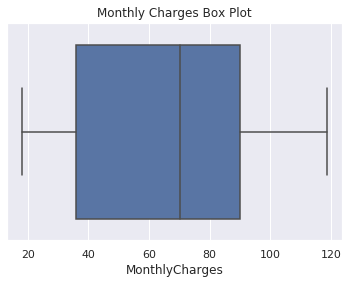

In [236]:
sns.boxplot(x = tcc.MonthlyCharges).set_title("Monthly Charges Box Plot");

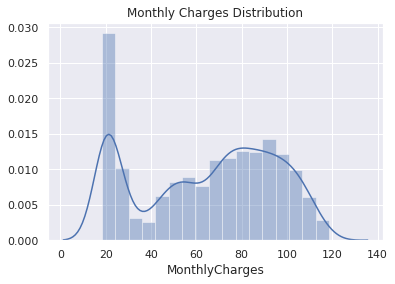

In [237]:
sns.distplot(tcc.MonthlyCharges).set_title("Monthly Charges Distribution");

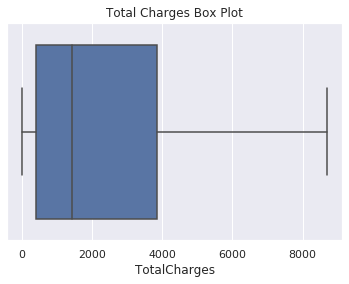

In [238]:
sns.boxplot(x = tcc.TotalCharges).set_title("Total Charges Box Plot");

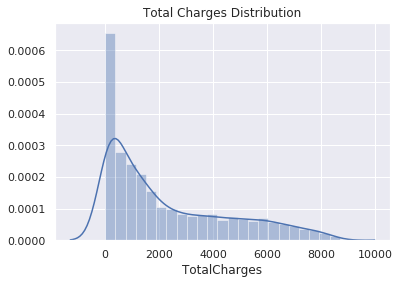

In [239]:
sns.distplot(tcc.TotalCharges).set_title("Total Charges Distribution");

In [240]:
tcc.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

/home/3005019/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



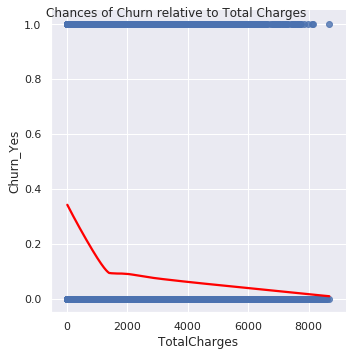

In [241]:
sns.lmplot("TotalCharges", "Churn_Yes", data = tcc, line_kws={'color': 'red'}, lowess = True, size = 5)
plt.suptitle("Chances of Churn relative to Total Charges");

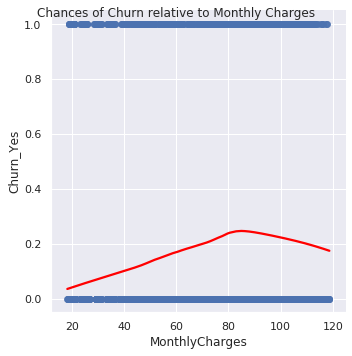

In [242]:
sns.lmplot("MonthlyCharges", "Churn_Yes", data = tcc, line_kws={'color': 'red'}, lowess = True, size = 5)
plt.suptitle("Chances of Churn relative to Monthly Charges");

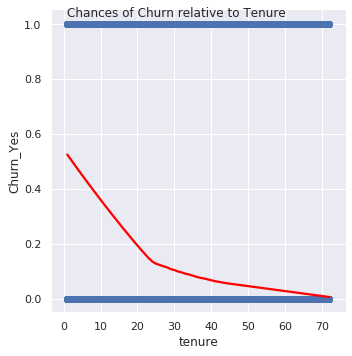

In [243]:
sns.lmplot("tenure", "Churn_Yes", data = tcc, line_kws={'color': 'red'}, lowess = True, size = 5)
plt.suptitle("Chances of Churn relative to Tenure");

## Logistic regression

We want to build a predictive model using _Churn_ as our dependent variable. First we try to run the regression by including all the variables.

In [244]:
tcc.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

Most of the variables differentiate between "No" and "No internet service". Given that the information about "Internet Service" or "No internet service" is already provided by the variable _InternetService_ , we can just analyze the impact of having a service that implies having Internet Service versus not having it, without considering that a person could have for example no OnlineSecurity due to the fact that they do not have Internet Service.

We will also exclude _TotalCharges_ from our model, since it is likely to be correlated with _MonthlyCharges_ (we are going to test this hypothesis by calculating the Pearson correlation coefficient).

In [245]:
# Pearson correlation coefficient
print("Coefficient:",scipy.stats.pearsonr(tcc["MonthlyCharges"], tcc["TotalCharges"])[0])
print("p-value:",scipy.stats.pearsonr(tcc["MonthlyCharges"], tcc["TotalCharges"])[1])

Coefficient: 0.6517385329480181
p-value: 0.0


The two variables are highly correlated.

In [246]:
tcc.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


Let's run a first regression including all the variables. We will then progressively improve our model.

In [247]:
# Intercept
tcc["intercept"] = 1.0

variables = tcc.copy()[['SeniorCitizen', 'tenure', 'MonthlyCharges', 
       'gender_Female', 'Partner_Yes', 'PhoneService_Yes',
        'Dependents_Yes', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
        'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'intercept']]

# Setting the model
logistical_regression = sm.Logit(tcc["Churn_Yes"], variables)

# Fitting the model
fitted_model = logistical_regression.fit()
fitted_model.summary2()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning:

overflow encountered in exp

/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning:

divide by zero encountered in log

/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Logit
========================================================================================
Model:                       Logit                     Pseudo R-squared:          inf   
Dependent Variable:          Churn_Yes                 AIC:                       inf   
Date:                        2019-10-11 15:27          BIC:                       inf   
No. Observations:            5614                      Log-Likelihood:            -inf  
Df Model:                    22                        LL-Null:                   0.0000
Df Residuals:                5591                      LLR p-value:               1.0000
Converged:                   1.0000                    Scale:                     1.0000
No. Iterations:              8.0000                                                     
----------------------------------------------------------------------------------------
                                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------------
SeniorCitizen                            0.1752   0.0949   1.8463 0.0648 -0.0108  0.3613
tenure                                  -0.0322   0.0026 -12.2511 0.0000 -0.0373 -0.0270
MonthlyCharges                          -0.0414   0.0357  -1.1600 0.2460 -0.1113  0.0285
gender_Female                            0.0357   0.0723   0.4936 0.6216 -0.1060  0.1773
Partner_Yes                              0.0035   0.0874   0.0401 0.9680 -0.1678  0.1748
PhoneService_Yes                         0.4231   0.7286   0.5808 0.5614 -1.0048  1.8511
Dependents_Yes                          -0.1606   0.1004  -1.5996 0.1097 -0.3575  0.0362
MultipleLines_Yes                        0.5071   0.1991   2.5474 0.0109  0.1169  0.8973
InternetService_DSL                      1.9111   0.9071   2.1068 0.0351  0.1332  3.6891
InternetService_Fiber optic              3.7613   1.7922   2.0987 0.0358  0.2486  7.2740
OnlineSecurity_Yes                      -0.1505   0.2008  -0.7493 0.4537 -0.5440  0.2431
OnlineBackup_Yes                         0.0835   0.1965   0.4249 0.6709 -0.3016  0.4685
DeviceProtection_Yes                     0.2523   0.1975   1.2773 0.2015 -0.1348  0.6394
TechSupport_Yes                         -0.2002   0.2021  -0.9905 0.3219 -0.5964  0.1960
StreamingTV_Yes                          0.6430   0.3666   1.7537 0.0795 -0.0756  1.3616
StreamingMovies_Yes                      0.7151   0.3671   1.9479 0.0514 -0.0044  1.4346
Contract_One year                       -0.6996   0.1183  -5.9160 0.0000 -0.9313 -0.4678
Contract_Two year                       -1.4462   0.1952  -7.4102 0.0000 -1.8287 -1.0637
PaperlessBilling_Yes                     0.2808   0.0826   3.4012 0.0007  0.1190  0.4427
PaymentMethod_Bank transfer (automatic) -0.0325   0.1269  -0.2562 0.7978 -0.2813  0.2162
PaymentMethod_Credit card (automatic)   -0.1307   0.1284  -1.0178 0.3088 -0.3824  0.1210
PaymentMethod_Electronic check           0.3287   0.1057   3.1098 0.0019  0.1215  0.5358
intercept                               -1.0825   0.1950  -5.5522 0.0000 -1.4647 -0.7004
========================================================================================

"""

To improve the goodness of our results we can first work on _PaymentMethod_. We will transform the variable _PaymentMethod_ in order to analyze the difference between automatic Payment Method and non automatic. Clients with automatic payment are less likely to churn with respect to clients with no automatic payment. We are not interested in the difference between Bank transfer and Credit card, or between Electronic check or Mailed check.

In [248]:
# Transforming PaymentMethod
def transform_payment(df):
    df["PaymentMethod_Automatic"] = df["PaymentMethod_Bank transfer (automatic)"] + df["PaymentMethod_Credit card (automatic)"]
    return df

tcc = transform_payment(tcc)

In [249]:
variables = tcc[['SeniorCitizen', 'tenure', 'MonthlyCharges', 
       'gender_Female', 'Partner_Yes',
        'Dependents_Yes', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
        'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Automatic', 'intercept']]

# Setting the model
logistical_regression = sm.Logit(tcc["Churn_Yes"], variables)

# Fitting the model
fitted_model = logistical_regression.fit()
fitted_model.summary2()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning:

overflow encountered in exp

/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning:

divide by zero encountered in log

/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit                 Pseudo R-squared:      inf   
Dependent Variable:      Churn_Yes             AIC:                   inf   
Date:                    2019-10-11 15:29      BIC:                   inf   
No. Observations:        5614                  Log-Likelihood:        -inf  
Df Model:                19                    LL-Null:               0.0000
Df Residuals:            5594                  LLR p-value:           1.0000
Converged:               1.0000                Scale:                 1.0000
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
SeniorCitizen                0.1899   0.0946   2.0086 0.0446  0.0046  0.3753
tenure                      -0.0315   0.0026 -12.0685 0.0000 -0.0367 -0.0264
MonthlyCharges              -0.0218   0.0069  -3.1685 0.0015 -0.0352 -0.0083
gender_Female                0.0407   0.0721   0.5638 0.5729 -0.1007  0.1820
Partner_Yes                  0.0121   0.0871   0.1385 0.8898 -0.1587  0.1828
Dependents_Yes              -0.1664   0.1002  -1.6611 0.0967 -0.3628  0.0299
MultipleLines_Yes            0.4180   0.1003   4.1693 0.0000  0.2215  0.6145
InternetService_DSL          1.4923   0.1928   7.7419 0.0000  1.1145  1.8701
InternetService_Fiber optic  2.9085   0.3733   7.7918 0.0000  2.1769  3.6401
OnlineSecurity_Yes          -0.2612   0.1010  -2.5869 0.0097 -0.4591 -0.0633
OnlineBackup_Yes            -0.0173   0.0907  -0.1908 0.8487 -0.1951  0.1605
DeviceProtection_Yes         0.1463   0.0932   1.5690 0.1166 -0.0364  0.3290
TechSupport_Yes             -0.3139   0.1015  -3.0926 0.0020 -0.5129 -0.1150
StreamingTV_Yes              0.4621   0.1110   4.1621 0.0000  0.2445  0.6797
StreamingMovies_Yes          0.5328   0.1092   4.8783 0.0000  0.3187  0.7468
Contract_One year           -0.7216   0.1180  -6.1144 0.0000 -0.9529 -0.4903
Contract_Two year           -1.4744   0.1948  -7.5703 0.0000 -1.8562 -1.0927
PaperlessBilling_Yes         0.2990   0.0823   3.6339 0.0003  0.1377  0.4602
PaymentMethod_Automatic     -0.3141   0.0809  -3.8845 0.0001 -0.4725 -0.1556
intercept                   -0.9610   0.1890  -5.0845 0.0000 -1.3315 -0.5906
============================================================================

"""

We will remove from our model _OnlineBackup_ , _DeviceProtection_ , _gender_ and _partner_ as they are not significant.

In [250]:
variables = tcc[['SeniorCitizen', 'tenure', 'MonthlyCharges', 
        'Dependents_Yes', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Automatic', 'intercept']]

# Setting the model
logistical_regression = sm.Logit(tcc["Churn_Yes"], variables)

# Fitting the model
fitted_model = logistical_regression.fit()
fitted_model.summary2()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning:

overflow encountered in exp

/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning:

divide by zero encountered in log

/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit                 Pseudo R-squared:      inf   
Dependent Variable:      Churn_Yes             AIC:                   inf   
Date:                    2019-10-11 15:29      BIC:                   inf   
No. Observations:        5614                  Log-Likelihood:        -inf  
Df Model:                15                    LL-Null:               0.0000
Df Residuals:            5598                  LLR p-value:           1.0000
Converged:               1.0000                Scale:                 1.0000
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
SeniorCitizen                0.1960   0.0939   2.0876 0.0368  0.0120  0.3799
tenure                      -0.0311   0.0024 -12.6970 0.0000 -0.0359 -0.0263
MonthlyCharges              -0.0187   0.0060  -3.1055 0.0019 -0.0306 -0.0069
Dependents_Yes              -0.1621   0.0903  -1.7953 0.0726 -0.3391  0.0149
MultipleLines_Yes            0.3940   0.0970   4.0605 0.0000  0.2038  0.5842
InternetService_DSL          1.4530   0.1892   7.6786 0.0000  1.0821  1.8239
InternetService_Fiber optic  2.7796   0.3461   8.0304 0.0000  2.1012  3.4580
OnlineSecurity_Yes          -0.2792   0.0993  -2.8115 0.0049 -0.4739 -0.0846
TechSupport_Yes             -0.3231   0.1007  -3.2089 0.0013 -0.5204 -0.1257
StreamingTV_Yes              0.4480   0.1078   4.1556 0.0000  0.2367  0.6593
StreamingMovies_Yes          0.5177   0.1062   4.8767 0.0000  0.3096  0.7257
Contract_One year           -0.7078   0.1177  -6.0148 0.0000 -0.9384 -0.4772
Contract_Two year           -1.4538   0.1943  -7.4804 0.0000 -1.8347 -1.0729
PaperlessBilling_Yes         0.2968   0.0822   3.6119 0.0003  0.1357  0.4579
PaymentMethod_Automatic     -0.3099   0.0808  -3.8373 0.0001 -0.4682 -0.1516
intercept                   -1.0083   0.1696  -5.9435 0.0000 -1.3408 -0.6758
============================================================================

"""

To improve the interpretability of our regression, instead of considering _tenure_ as a continuous variable we can divide it into 4 clusters.

In [251]:
def cluster(df):
    df["tenure_0:18"]  = 0
    df["tenure_19:36"] = 0
    df["tenure_37:54"] = 0
    df["tenure_55:72"] = 0

    df.loc[df.tenure <= 18, "tenure_0:18"] = 1
    df.loc[((df.tenure >= 19) & (df.tenure <= 36)), "tenure_19:36"] = 1
    df.loc[((df.tenure >= 37) & (df.tenure <= 54)), "tenure_37:54"] = 1
    df.loc[df.tenure >= 55, "tenure_55:72"] = 1
    
    return df

tcc = cluster(tcc)

In [252]:
tcc.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,intercept,PaymentMethod_Automatic,tenure_0:18,tenure_19:36,tenure_37:54,tenure_55:72
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1.0,0,1,0,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1.0,0,0,1,0,0
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1.0,0,1,0,0,0
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1.0,1,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1.0,0,1,0,0,0


In [253]:
tcc.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

Let's run a new regression.

In [254]:
variables = tcc[['SeniorCitizen', 'MonthlyCharges', 
        'Dependents_Yes', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Automatic', 'tenure_19:36',
       'tenure_37:54', 'tenure_55:72','intercept']]

# Setting the model
logistical_regression = sm.Logit(tcc["Churn_Yes"], variables)

# Fitting the model
fitted_model = logistical_regression.fit()
fitted_model.summary2()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning:

overflow encountered in exp

/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning:

divide by zero encountered in log

/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:                    Logit                Pseudo R-squared:     inf   
Dependent Variable:       Churn_Yes            AIC:                  inf   
Date:                     2019-10-11 15:30     BIC:                  inf   
No. Observations:         5614                 Log-Likelihood:       -inf  
Df Model:                 17                   LL-Null:              0.0000
Df Residuals:             5596                 LLR p-value:          1.0000
Converged:                1.0000               Scale:                1.0000
No. Iterations:           8.0000                                           
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
SeniorCitizen                0.1854   0.0933  1.9872 0.0469  0.0025  0.3683
MonthlyCharges              -0.0206   0.0060 -3.4145 0.0006 -0.0324 -0.0088
Dependents_Yes              -0.1787   0.0901 -1.9831 0.0474 -0.3553 -0.0021
MultipleLines_Yes            0.3403   0.0968  3.5153 0.0004  0.1506  0.5300
InternetService_DSL          1.4899   0.1889  7.8881 0.0000  1.1197  1.8601
InternetService_Fiber optic  2.8638   0.3465  8.2649 0.0000  2.1847  3.5429
OnlineSecurity_Yes          -0.3084   0.0990 -3.1145 0.0018 -0.5025 -0.1143
TechSupport_Yes             -0.3112   0.1008 -3.0889 0.0020 -0.5087 -0.1137
StreamingTV_Yes              0.4306   0.1078  3.9951 0.0001  0.2194  0.6418
StreamingMovies_Yes          0.5112   0.1060  4.8217 0.0000  0.3034  0.7190
Contract_One year           -0.8516   0.1172 -7.2687 0.0000 -1.0812 -0.6220
Contract_Two year           -1.7694   0.1967 -8.9943 0.0000 -2.1550 -1.3838
PaperlessBilling_Yes         0.2886   0.0822  3.5107 0.0004  0.1275  0.4498
PaymentMethod_Automatic     -0.3609   0.0803 -4.4936 0.0000 -0.5183 -0.2035
tenure_19:36                -1.0021   0.1024 -9.7842 0.0000 -1.2028 -0.8013
tenure_37:54                -0.9416   0.1202 -7.8328 0.0000 -1.1773 -0.7060
tenure_55:72                -1.4035   0.1470 -9.5469 0.0000 -1.6916 -1.1153
intercept                   -1.0519   0.1704 -6.1727 0.0000 -1.3859 -0.7179
===========================================================================

"""

Let's calculate the VIF to see if there is multicollinearity among our variables.

In [255]:
vif = pd.DataFrame()
vif["Variables"]  = variables.columns[0:-1]
vif["VIF Factor"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1]-1)]
vif

,Variables,VIF Factor
0,SeniorCitizen,1.134040
1,MonthlyCharges,25.523398
2,Dependents_Yes,1.118479
3,MultipleLines_Yes,1.788026
4,InternetService_DSL,6.107783
5,InternetService_Fiber optic,22.770521
6,OnlineSecurity_Yes,1.606637
7,TechSupport_Yes,1.686428
8,StreamingTV_Yes,2.338609
9,StreamingMovies_Yes,2.281422


The two _InternetService_ variables have a high VIF, along with _MonthlyCharges_. A possible explanation is that customers who have the Optic Fiber connection pay a different price compared to those who have a DSL connection. For this reason, we are going to exclude _MonthlyCharges_ from our model, and then re-run our VIF analysis. This time around, we expect a low VIF for both _InternetService_ variables.

We are also going to re-insert in our regression _OnlineBackup_ and _DeviceProtection_, which we removed earlier on, as they might have been affected by multicollinearity.

In [256]:
variables = tcc[['SeniorCitizen',
        'Dependents_Yes', 'MultipleLines_Yes',
         'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
        'TechSupport_Yes', "OnlineBackup_Yes", "DeviceProtection_Yes", 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Automatic', 'tenure_19:36',
       'tenure_37:54', 'tenure_55:72','intercept']]

vif = pd.DataFrame()
vif["Variables"]  = variables.columns[0:-1]
vif["VIF Factor"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1]-1)]
vif

,Variables,VIF Factor
0,SeniorCitizen,1.133239
1,Dependents_Yes,1.118640
2,MultipleLines_Yes,1.317114
3,InternetService_DSL,3.216419
4,InternetService_Fiber optic,3.887170
5,OnlineSecurity_Yes,1.397475
6,TechSupport_Yes,1.463103
7,OnlineBackup_Yes,1.362366
8,DeviceProtection_Yes,1.464881
9,StreamingTV_Yes,1.618622


And, in fact, we are right: data proves that _MonthlyCharges_ greatly depend on _InternetService_.

What we need to do now is just to run our logistic regression as before, this time without _MonthlyCharges_.

In [257]:
# Setting the model
logistical_regression = sm.Logit(tcc["Churn_Yes"], variables)

# Fitting the model
fitted_model = logistical_regression.fit()
fitted_model.summary2()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning:

overflow encountered in exp

/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning:

divide by zero encountered in log

/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit                 Pseudo R-squared:      inf   
Dependent Variable:      Churn_Yes             AIC:                   inf   
Date:                    2019-10-11 15:30      BIC:                   inf   
No. Observations:        5614                  Log-Likelihood:        -inf  
Df Model:                18                    LL-Null:               0.0000
Df Residuals:            5595                  LLR p-value:           1.0000
Converged:               1.0000                Scale:                 1.0000
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
SeniorCitizen                0.2004   0.0932   2.1495 0.0316  0.0177  0.3831
Dependents_Yes              -0.1844   0.0900  -2.0481 0.0406 -0.3609 -0.0079
MultipleLines_Yes            0.1872   0.0843   2.2204 0.0264  0.0220  0.3525
InternetService_DSL          1.1075   0.1439   7.6970 0.0000  0.8255  1.3895
InternetService_Fiber optic  1.8374   0.1479  12.4204 0.0000  1.5474  2.1273
OnlineSecurity_Yes          -0.4191   0.0931  -4.5033 0.0000 -0.6015 -0.2367
TechSupport_Yes             -0.4293   0.0940  -4.5664 0.0000 -0.6136 -0.2451
OnlineBackup_Yes            -0.1986   0.0838  -2.3700 0.0178 -0.3629 -0.0344
DeviceProtection_Yes        -0.0062   0.0866  -0.0710 0.9434 -0.1759  0.1636
StreamingTV_Yes              0.2204   0.0882   2.4984 0.0125  0.0475  0.3933
StreamingMovies_Yes          0.3106   0.0876   3.5436 0.0004  0.1388  0.4823
Contract_One year           -0.8741   0.1175  -7.4362 0.0000 -1.1045 -0.6437
Contract_Two year           -1.7892   0.1975  -9.0589 0.0000 -2.1763 -1.4021
PaperlessBilling_Yes         0.2971   0.0821   3.6166 0.0003  0.1361  0.4581
PaymentMethod_Automatic     -0.3668   0.0803  -4.5676 0.0000 -0.5242 -0.2094
tenure_19:36                -0.9822   0.1027  -9.5678 0.0000 -1.1834 -0.7810
tenure_37:54                -0.9011   0.1224  -7.3633 0.0000 -1.1410 -0.6613
tenure_55:72                -1.3504   0.1513  -8.9281 0.0000 -1.6469 -1.0540
intercept                   -1.4580   0.1259 -11.5846 0.0000 -1.7047 -1.2114
============================================================================

"""

_OnlineBackup_ is now significant, whereas _DeviceProtection_ stays unsignificant. We are going to remove the latter from the model.

In [258]:
variables = tcc[['SeniorCitizen',
        'Dependents_Yes', 'MultipleLines_Yes',
         'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
        'TechSupport_Yes', "OnlineBackup_Yes", 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Automatic', 'tenure_19:36',
       'tenure_37:54', 'tenure_55:72','intercept']]

# Setting the model
logistical_regression = sm.Logit(tcc["Churn_Yes"], variables)

# Fitting the model
fitted_model = logistical_regression.fit()
fitted_model.summary2()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning:

overflow encountered in exp

/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning:

divide by zero encountered in log

/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/3005019/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit                 Pseudo R-squared:      inf   
Dependent Variable:      Churn_Yes             AIC:                   inf   
Date:                    2019-10-11 15:30      BIC:                   inf   
No. Observations:        5614                  Log-Likelihood:        -inf  
Df Model:                17                    LL-Null:               0.0000
Df Residuals:            5596                  LLR p-value:           1.0000
Converged:               1.0000                Scale:                 1.0000
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
SeniorCitizen                0.2003   0.0932   2.1487 0.0317  0.0176  0.3829
Dependents_Yes              -0.1844   0.0900  -2.0487 0.0405 -0.3609 -0.0080
MultipleLines_Yes            0.1872   0.0843   2.2200 0.0264  0.0219  0.3524
InternetService_DSL          1.1063   0.1430   7.7371 0.0000  0.8261  1.3866
InternetService_Fiber optic  1.8361   0.1468  12.5062 0.0000  1.5483  2.1238
OnlineSecurity_Yes          -0.4190   0.0931  -4.5028 0.0000 -0.6014 -0.2366
TechSupport_Yes             -0.4298   0.0938  -4.5807 0.0000 -0.6137 -0.2459
OnlineBackup_Yes            -0.1988   0.0838  -2.3717 0.0177 -0.3630 -0.0345
StreamingTV_Yes              0.2197   0.0876   2.5069 0.0122  0.0479  0.3914
StreamingMovies_Yes          0.3099   0.0872   3.5545 0.0004  0.1390  0.4808
Contract_One year           -0.8749   0.1171  -7.4722 0.0000 -1.1043 -0.6454
Contract_Two year           -1.7902   0.1970  -9.0891 0.0000 -2.1762 -1.4042
PaperlessBilling_Yes         0.2972   0.0821   3.6183 0.0003  0.1362  0.4582
PaymentMethod_Automatic     -0.3670   0.0802  -4.5752 0.0000 -0.5243 -0.2098
tenure_19:36                -0.9826   0.1026  -9.5810 0.0000 -1.1836 -0.7816
tenure_37:54                -0.9020   0.1218  -7.4085 0.0000 -1.1406 -0.6634
tenure_55:72                -1.3516   0.1503  -8.9900 0.0000 -1.6463 -1.0569
intercept                   -1.4577   0.1257 -11.5928 0.0000 -1.7041 -1.2112
============================================================================

"""

This is our final model. Let's get the marginal effect of our variables in order to be able to easily interpret them.

In [259]:
margeff = fitted_model.get_margeff()
margeff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:              Churn_Yes
Method:                          dydx
At:                           overall
===============================================================================================
                                 dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
SeniorCitizen                   0.0277      0.013      2.153      0.031       0.002       0.053
Dependents_Yes                 -0.0255      0.012     -2.051      0.040      -0.050      -0.001
MultipleLines_Yes               0.0259      0.012      2.224      0.026       0.003       0.049
InternetService_DSL             0.1531      0.019      7.895      0.000       0.115       0.191
InternetService_Fiber optic     0.2542      0.019     13.268      0.000       0.217       0.292
OnlineSecurity_Yes             -0.0580      0.013     -4.537      0.000      -0.083      -0.033
TechSupport_Yes                -0.0595      0.013     -4.619      0.000      -0.085      -0.034
OnlineBackup_Yes               -0.0275      0.012     -2.378      0.017      -0.050      -0.005
StreamingTV_Yes                 0.0304      0.012      2.512      0.012       0.007       0.054
StreamingMovies_Yes             0.0429      0.012      3.570      0.000       0.019       0.066
Contract_One year              -0.1211      0.016     -7.593      0.000      -0.152      -0.090
Contract_Two year              -0.2478      0.027     -9.153      0.000      -0.301      -0.195
PaperlessBilling_Yes            0.0411      0.011      3.636      0.000       0.019       0.063
PaymentMethod_Automatic        -0.0508      0.011     -4.609      0.000      -0.072      -0.029
tenure_19:36                   -0.1360      0.014     -9.935      0.000      -0.163      -0.109
tenure_37:54                   -0.1249      0.016     -7.577      0.000      -0.157      -0.093
tenure_55:72                   -0.1871      0.020     -9.288      0.000      -0.227      -0.148
===============================================================================================
"""

The results are largely consistent with our plottings: 
- Both _InternetService_ variables present a positive impact on the churn rate, with Optic Fiber's being almost twice the of DSL's. It might be a good idea to consider discontinuing at least the Optic Fiber service or improving it.
- Senior customers tend to churn more easily.
- Additional Internet Services (_OnlineSecurity_, _TechSupport_, _OnlineBackup_) negatively affect Churn Rate and are therefore a potential way to decrease it in a managerial setting. _DeviceProtection_ on the other hand is inconsistent with our plottings, and it appears that its effect is largely explained by the other variables of our model. _StreamingMovies_ and _StreamingTV_, unlike expected, are significant and positively affect the Churn Rate: the management might consider stop offering those services.

## Model evaluation

We will now fit this logistic regression to the test data to evaluate the effectiveness of our model.

In [260]:
test = fill_missing(test)
test = get_dummy(test)
test = transform_payment(test)
test = cluster(test)

In [272]:
test["intercept"] = 1.0

variables = test[['SeniorCitizen',
        'Dependents_Yes', 'MultipleLines_Yes',
         'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
        'TechSupport_Yes', "OnlineBackup_Yes", 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Automatic', 'tenure_19:36',
       'tenure_37:54', 'tenure_55:72','intercept']]

y = test.Churn_Yes

In [302]:
model_predict = fitted_model.predict(variables)

Let's measure the goodness of our model by building the confusion matrix.

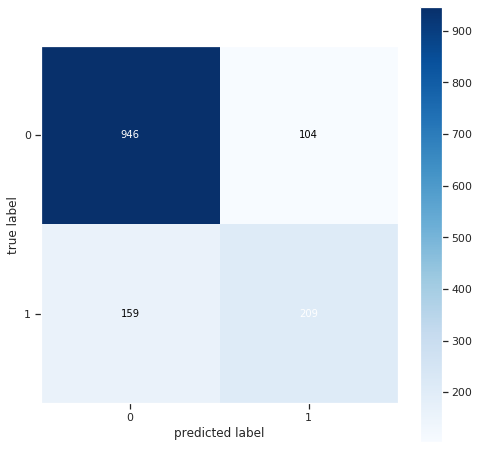

In [311]:
pred = model_predict.copy()
pred[pred >= 0.5] = 1
pred[pred < 0.5] = 0

cm = skplt.metrics.confusion_matrix(y_true=y, y_pred=pred)
plot_confusion_matrix(cm, figsize=(8, 8), colorbar=True);

We are now going to plot the Kolmogorov–Smirnov statistics in order to set a better probability threshold for our prediction.

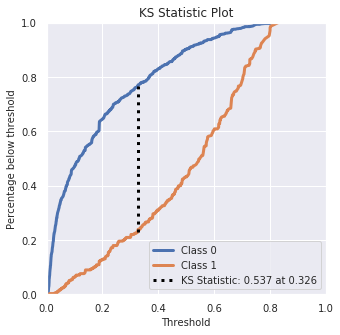

In [312]:
# Compute the predicted probability
proba = np.array([ 1 - model_predict, model_predict ])

skplt.metrics.plot_ks_statistic(test["Churn_Yes"], proba.T, figsize=(5, 5));

0.326 is going to be our threshold. We begin the solution of the business case by considering as potential churners all the observations with a predicted probability of churning greater than 0.326.

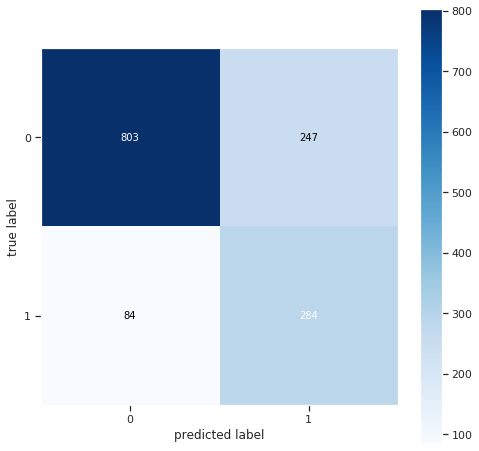

In [314]:
pred = model_predict.copy()
pred[pred >= 0.326] = 1
pred[pred < 0.326] = 0

cm = skplt.metrics.confusion_matrix(y_true=y, y_pred=pred)
plot_confusion_matrix(cm, figsize=(8, 8), colorbar=True);

The model now predicts a higher number of potential churners, in order to optimize the true positive rate and false positive rate.

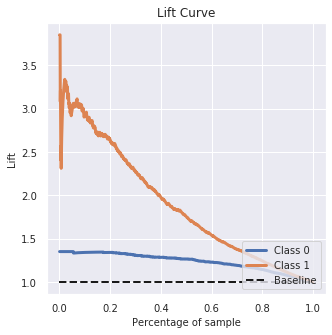

In [316]:
# Lift Chart
skplt.metrics.plot_lift_curve(test["Churn_Yes"], proba.T, figsize=(5, 5));

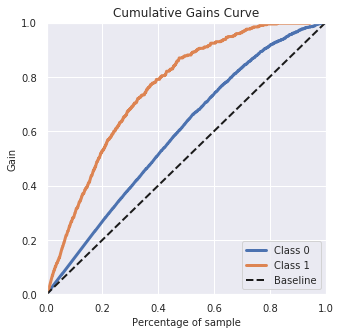

In [317]:
# Gain Chart
skplt.metrics.plot_cumulative_gain(test["Churn_Yes"], proba.T, figsize=(5, 5));

## Resampling methods

As a final part of our work, we are going to perform a nonparametric bootstrap to assess the precision of our estimates.

/home/3005019/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



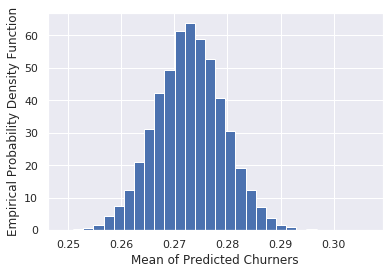

In [318]:
def bootstrap_replicate(data, function):
    bs_sample = np.random.choice(data, len(data))
    return function(bs_sample)

bs_results = np.empty(10000)

for i in range(10000):
    bs_results[i] = bootstrap_replicate(model_predict, np.mean)

_ = plt.hist(bs_results, bins = 30, normed = True)
_ = plt.xlabel("Mean of Predicted Churners")
_ = plt.ylabel("Empirical Probability Density Function")
plt.show()

In [324]:
print("Bootstrap confidence interval:", np.percentile(bs_results, [2.5, 97.5]))
print("Bootstrap mean:", round(bs_results.mean(), 3))

Bootstrap confidence interval: [0.26024003 0.28567477]
Bootstrap mean: 0.273


Let's compare the estimates of our prediction with the mean of the sample.

In [326]:
print("Sample mean:", round(test.Churn_Yes.mean(), 3))

Sample mean: 0.26


Our prediction is very close to the actual churn rate of the sample.

<a id='another_cell'></a>

# Appendix

This regression aims to assess the correlation between additional internet services and _Churn_ also for low values of tenure. We want to prove that the impact of additional services on _Churn_ is causal and not due to an omitted variable or selection bias. This means that additional services are not given as gift to those clients with a higher tenure but they have an actual impact on the churn phenomenon.

In [200]:
low_tenure = tcc[tcc["tenure_0:18"]+tcc["tenure_19:36"]==1]

variables = low_tenure[['SeniorCitizen',
        'Dependents_Yes', 'MultipleLines_Yes',
         'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes',
        'TechSupport_Yes', "OnlineBackup_Yes", 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Automatic', 'tenure_19:36',
       'tenure_37:54', 'tenure_55:72','intercept']]

# Setting the model
logistical_regression_low = sm.Logit(low_tenure["Churn_Yes"], variables)

# Fitting the model
fitted_model_low = logistical_regression.fit()
fitted_model_low.summary2()

/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning:

divide by zero encountered in log

/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/home/matteo/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



Optimization terminated successfully.
         Current function value: inf
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit                 Pseudo R-squared:      inf   
Dependent Variable:      Churn_Yes             AIC:                   inf   
Date:                    2018-12-24 22:00      BIC:                   inf   
No. Observations:        7032                  Log-Likelihood:        -inf  
Df Model:                17                    LL-Null:               0.0000
Df Residuals:            7014                  LLR p-value:           1.0000
Converged:               1.0000                Scale:                 1.0000
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
SeniorCitizen                0.2334   0.0832   2.8057 0.0050  0.0704  0.3965
Dependents_Yes              -0.1819   0.0809  -2.2476 0.0246 -0.3405 -0.0233
MultipleLines_Yes            0.1762   0.0758   2.3234 0.0202  0.0276  0.3249
InternetService_DSL          1.0541   0.1282   8.2235 0.0000  0.8029  1.3054
InternetService_Fiber optic  1.8322   0.1310  13.9916 0.0000  1.5756  2.0889
OnlineSecurity_Yes          -0.4310   0.0836  -5.1557 0.0000 -0.5948 -0.2671
TechSupport_Yes             -0.3706   0.0846  -4.3795 0.0000 -0.5364 -0.2047
OnlineBackup_Yes            -0.1864   0.0755  -2.4685 0.0136 -0.3344 -0.0384
StreamingTV_Yes              0.2662   0.0785   3.3903 0.0007  0.1123  0.4200
StreamingMovies_Yes          0.2812   0.0782   3.5963 0.0003  0.1280  0.4345
Contract_One year           -0.8483   0.1057  -8.0254 0.0000 -1.0555 -0.6412
Contract_Two year           -1.7220   0.1766  -9.7507 0.0000 -2.0681 -1.3759
PaperlessBilling_Yes         0.3538   0.0738   4.7938 0.0000  0.2091  0.4984
PaymentMethod_Automatic     -0.3145   0.0719  -4.3764 0.0000 -0.4553 -0.1736
tenure_19:36                -1.0135   0.0919 -11.0306 0.0000 -1.1935 -0.8334
tenure_37:54                -1.0141   0.1102  -9.2040 0.0000 -1.2300 -0.7981
tenure_55:72                -1.4425   0.1367 -10.5496 0.0000 -1.7105 -1.1745
intercept                   -1.5123   0.1120 -13.5003 0.0000 -1.7319 -1.2928
============================================================================

"""

CLICK [HERE](#HERE) TO GO KEEP READING